In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# imgOpenCV = cv2.imread('../image/sample_parrot-image.jpg', cv2.IMREAD_GRAYSCALE)
imgOpenCV = cv2.imread('../../image/test.jpg', cv2.IMREAD_GRAYSCALE)

In [2]:
def box_filter(image, kernel_size=3):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd integer.")
    return cv2.blur(image, (kernel_size, kernel_size))

In [1]:
def gaussian_filter(image, kernel_size=3):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [4]:
def laplacian_filter(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    return laplacian

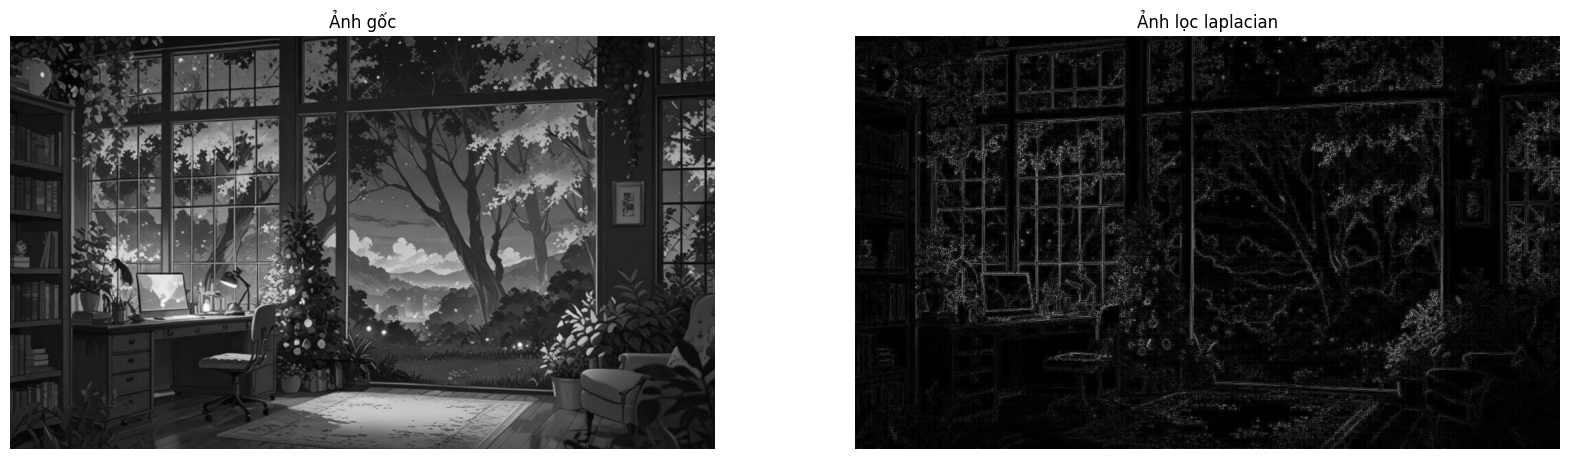

In [5]:
img = laplacian_filter(imgOpenCV)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(img,  cmap='gray')
axes[1].set_title('Ảnh lọc laplacian')
axes[1].axis('off')
plt.show()

In [6]:
def sharpen_filter(image, alpha=0.5):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    image_float = image.astype(np.float64)
    sharpened = image_float - alpha * laplacian
    
    return np.clip(sharpened, 0, 255).astype(np.uint8)

(np.float64(-0.5), np.float64(1023.5), np.float64(599.5), np.float64(-0.5))

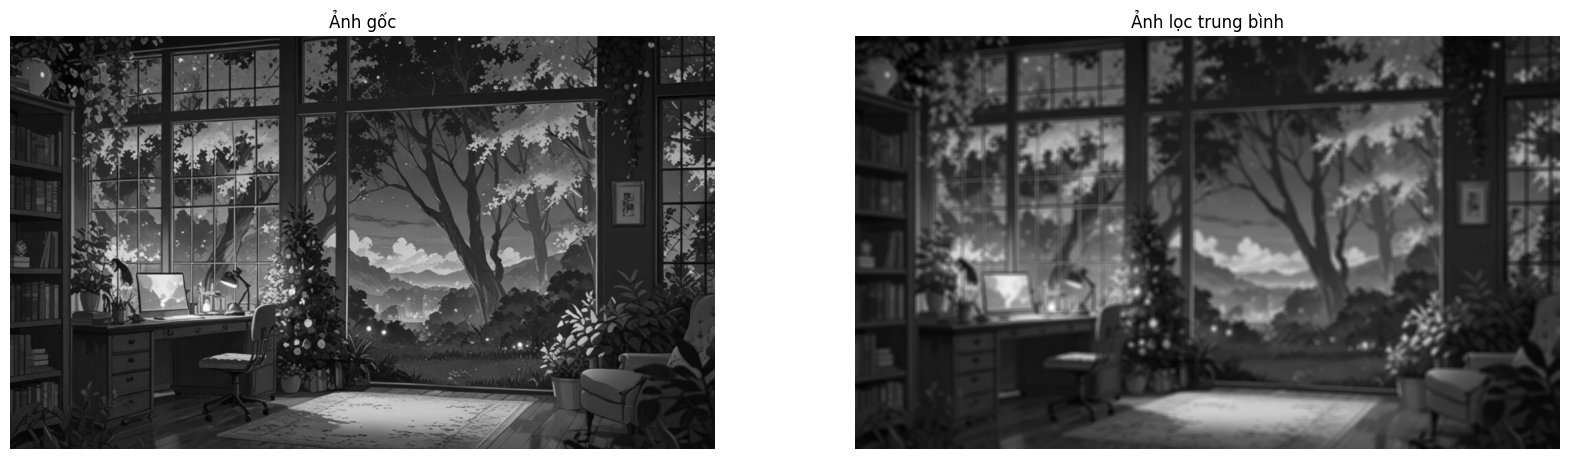

In [7]:
image_box = box_filter(imgOpenCV, kernel_size=7)


fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(image_box,  cmap='gray')
axes[1].set_title('Ảnh lọc trung bình')
axes[1].axis('off')

(np.float64(-0.5), np.float64(1023.5), np.float64(599.5), np.float64(-0.5))

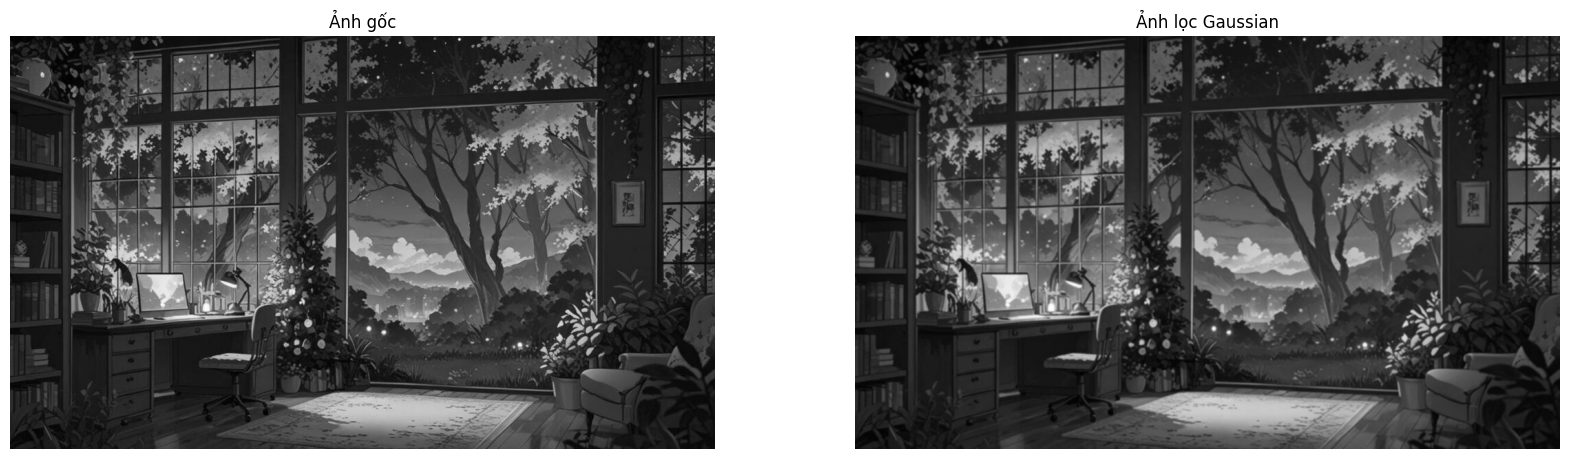

In [8]:
image_gaussian = gaussian_filter(imgOpenCV, kernel_size=3)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(image_gaussian,cmap='gray')
axes[1].set_title('Ảnh lọc Gaussian')
axes[1].axis('off')

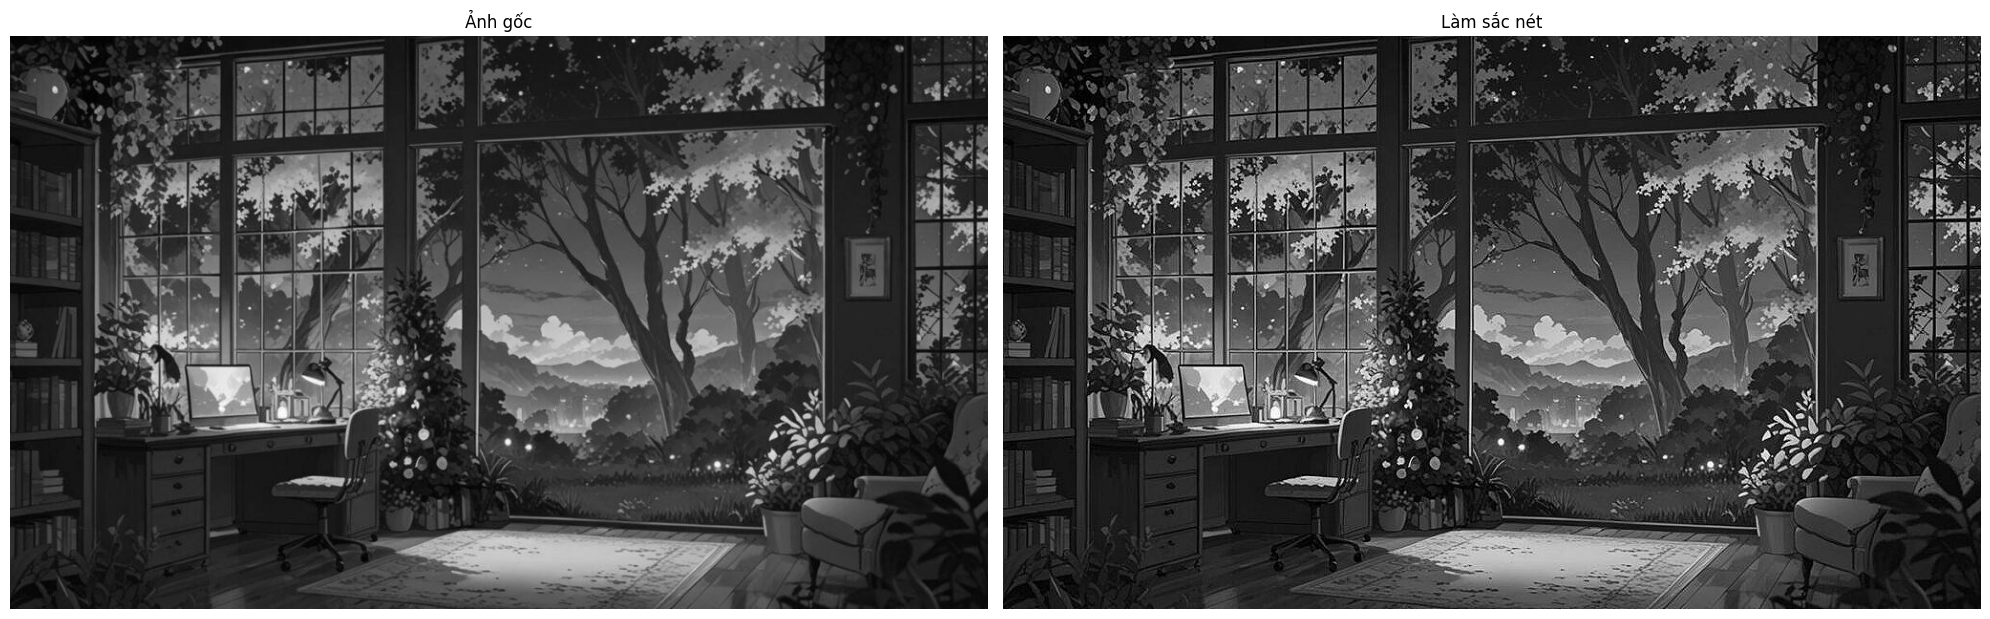

In [9]:
image_sharpened_light = sharpen_filter(imgOpenCV)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(imgOpenCV, cmap='gray')
axes[0].set_title('Ảnh gốc')
axes[0].axis('off')

axes[1].imshow(image_sharpened_light, cmap='gray')
axes[1].set_title('Làm sắc nét')
axes[1].axis('off')

plt.tight_layout()
plt.show()